<a href="https://colab.research.google.com/github/Vishal1711/AuE893-Deep-Learning-Application-in-Engineering/blob/main/AuE8930_Mini_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 3

Welcome to your Third Mini Project! You will build a convolutional neural network to classify objects and tune hyperparameters to optimize your model. **Please complete your assignment in this Jupyter Notebook.**

---

**Requirements**: 
- TensorFlow 2.x is allowed to implement your NNs.
- Your code should follow [PEP 8](https://www.python.org/dev/peps/pep-0008/) with necessary comments.
- Write your analysis and conclusion in a proper format. [Click here](https://www.markdownguide.org/basic-syntax/) to learn how to use Markdown.

## Problem Description
This dataset consists of four different classes: **Bicycle, Motorcycle, Car, Truck**. Bicycle, Motorcycle, and Car data are collected from the 2005 PASCAL dataset [VOC2005](http://host.robots.ox.ac.uk/pascal/VOC/databases.html#VOC2005_1). Moreover, the Truck data is collected from the Internet (see examples below).

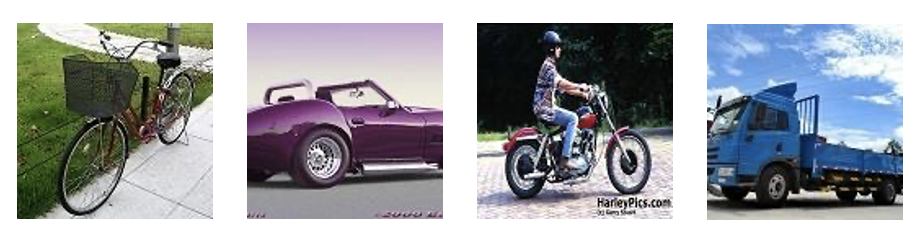



- The width and height of each **RGB** image are 120 pixels and 120 pixels respectively.
- The filename of an image represents its index.
- Labels are saved in `labels.csv` where the first column is the image index and the second column is the label.
- Labels and their corresponding classes are listed below.

|Label|0|1|2|3|
|-----|:-:|:-:|:-:|:-:|
|Class|Bicycle|Car|Motocycle|Truck|

### Tasks

1. Load and pre-process data
    - Define a function of `load_data()` to load imges and labels.
    - Implement a function of `preprocess()` to pre-process the loaded data.
        - Normalization
        - One-hot encoding
        - Splitting dataset into training set and test set
    - Plot some examples in your training set. **Note**: all four classes should be shown in your plot.
2. Build your CNN model
    - Build a CNN based on TensorFlow 2.x.
    - Use the [TensorFlow embedded function](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model) to visualize your model.
3. Train your model
    - Initialize hyperparameters.
    - Train your model.
    - Evaluate the trained model on the test data in each training epoch.
    - Visualize the performance including training loss, training accuracy, test loss, and test accuracy.
    - Plot some examples of your prediction results.
4. Tune hyperparameters
    - Generate a set of models by tuning hyperparameters including:
        - kernel size
        - number of hidden layers
        - learning rate
        - epochs
        - activation function
    - Analyze the effects of each hyperparameter shown above.
5. Conclusion
    - Visualize the optimal model.
    - Describe its hyperparameters.
    - Plot the performance.
    - Plot some examples of prediction results.

## Task 1: Load and Pre-Process Dataset

In [ ]:
# Importing Libraries
import pandas as pd
import csv
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from tensorflow.keras.utils import to_categorical

In [ ]:
def load_data(folder):

  #   """
  #     Load the dataset, included images and labels from the given folder.
      
  #     Parameters
  #     ----------
  #     folder: string
  #         Path of the folder saved dataset.

  #     Return
  #     ----------
  #     images: ndarray
  #         Output of images.
  #     labels: ndarray
  #         Output of labels.
  # """
  # TODO: write your code here
  path = folder
  images = []
  imagepath = [f'{folder}/{file}' for file in sorted(os.listdir(folder)) if file.endswith(".jpg")]  # Read the file for images from colab folder
 
  for i in range(len(imagepath)):
    images.append(plt.imread(imagepath[i]))
  images = np.array(images)

  df = pd.read_csv('/content/dataset/labels.csv', header=0, index_col=None)         # Read the labels
  label = df.iloc[:,[1]]
  label = np.array(label)

  return images, label
   



In [ ]:
def preprocess(X, y, train_size=0.8):
  #   """
  #     Normalize the features from the range [0, 255] to the range [0, 1].
  #     One-hot encode labels.
  #     Split the dataset into training set and test set. 
      
  #     Parameters
  #     ----------
  #     X: ndarray
  #         Input of images.
  #     y: ndarray
  #         Input of labels.
  #     train_size: float
  #         The proportion of the dataset to include in the train split.

  #     Return
  #     ----------
  #     X_train: ndarray
  #         Splitted features of the training data.
  #     y_train: ndarray
  #         Splitted labels of the traning data.
  #     X_test: ndarray
  #         Splitted features of the test data.
  #     y_test: ndarray
  #         Splitted labels of the test data.
  # """
  # TODO: write your code here
    
  encoded = to_categorical(label)                  # Hotencoding for labels
  
  X = np.array(X)
  split = int((train_size)*len(X))                 # Split data into train and test dataset
  X_train = X[0:split]
  X_train = X_train/255                            # Training data normalization
  X_test = X[split:]
  X_test = X_test/255                              # Test data normalization
  y_train = encoded[0:split]
  y_test = encoded[split:]
  print(y_train[756])
  return X_train, X_test, y_train, y_test


In [ ]:
# TODO: load dataset

images, label = load_data('/content/dataset/')


# TODO: pre-process dataset

X_train, X_test, y_train, y_test = preprocess(images, label, train_size=0.8)


# TODO: print out shapes of X_train, y_train, X_test, and y_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


[0. 0. 0. 1.]
(759, 120, 120, 3)
(759, 4)
(190, 120, 120, 3)
(190, 4)


Text(0.5, 1.0, 'Truck')

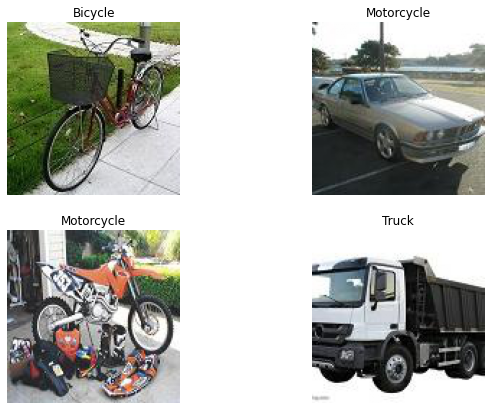

In [ ]:
# TODO: get examples of each class from the training set

bicycle =(X_train[0])
car = (X_train[255])
motorcycle = (X_train[475])
truck = (X_train[735])


# TODO: plot out selected examples in ONE figure

fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

# Adds a subplot for Bicycle image
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(bicycle)
plt.axis('off')
plt.title("Bicycle")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(car)
plt.axis('off')
plt.title("Motorcycle")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(motorcycle)
plt.axis('off')
plt.title("Motorcycle")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(truck)
plt.axis('off')
plt.title("Truck")



## Task 2: Build Convolutional Neural Network

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D as Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
import talos
from tensorflow.keras.activations import *
from tensorflow.keras.activations import relu, elu, linear, sigmoid

In [ ]:
# TODO: build a CNN model

def my_model(params):

  inputs = keras.Input(shape=(120, 120 ,3))                               # Input data shape                                  
  x = layers.Conv2D(64, 3)(inputs)                                        # Convolution by 64 filters with size (3,3)
  x = keras.activations.relu(x)                                           # Relu activation function
  x = Dropout(0.5)(x)                                                     # Dropout for overfitting
  x = layers.MaxPooling2D((2,2),)(x)                                      # Max pooling 
  x = layers.Conv2D(32, 3)(x)                                             
  x = keras.activations.relu(x)
  x = layers.MaxPooling2D((2,2),)(x)
  x = layers.Flatten()(x)                                                 # Flatten dataset for input to Fully connected layer
  x = layers.Dense(64, activation='relu', name='first_layer')(x)          # First layer of fully connecte dlayer with 64 neuron and relu activation
  x = Dropout(0.5)(x)
  x = layers.Dense(32, activation='relu', name='second_layer')(x)         # Second layer of fully connecte dlayer with 64 neuron and relu activation
  x = Dropout(0.3)(x)
  outputs = layers.Dense(4, activation='softmax')(x)                      # Output layer with 4 node with softmax activation function
  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(Adam(learning_rate=0.001), 'categorical_crossentropy', metrics=['accuracy'])  # Learning rate with Adam optimizer
  return model

# Parameters for first network

params = {'activation':'relu',
          'learning_rate': 0.001,
          'batch_size': 8}

model = my_model(params)

In [ ]:
# TODO: visualize the model

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 118, 118, 64)      1792      
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 118, 118, 64)      0         
                                                                 
 dropout (Dropout)           (None, 118, 118, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 32)        18464     
                                                             

## Task 3: Train Model

In [ ]:
# TODO: initialize hyperparameters

params = {'activation':'relu',
          'learning_rate': 0.001,
          'batch_size': 8}

In [ ]:
# TODO: train the model

history = model.fit(X_train, y_train, batch_size=8, epochs=20, validation_data=(X_test, y_test), shuffle = True)


Epoch 1/20
95/95 [==============================] - 3s 24ms/step - loss: 1.3769 - accuracy: 0.3518 - val_loss: 1.1521 - val_accuracy: 0.4684
Epoch 2/20
95/95 [==============================] - 2s 19ms/step - loss: 1.1415 - accuracy: 0.5323 - val_loss: 1.1405 - val_accuracy: 0.4842
Epoch 3/20
95/95 [==============================] - 2s 19ms/step - loss: 1.0606 - accuracy: 0.5758 - val_loss: 0.9552 - val_accuracy: 0.6263
Epoch 4/20
95/95 [==============================] - 2s 24ms/step - loss: 0.9179 - accuracy: 0.6403 - val_loss: 1.0273 - val_accuracy: 0.5895
Epoch 5/20
95/95 [==============================] - 2s 23ms/step - loss: 0.7808 - accuracy: 0.7115 - val_loss: 0.9293 - val_accuracy: 0.6421
Epoch 6/20
95/95 [==============================] - 2s 19ms/step - loss: 0.6021 - accuracy: 0.7642 - val_loss: 1.4348 - val_accuracy: 0.4632
Epoch 7/20
95/95 [==============================] - 2s 20ms/step - loss: 0.5323 - accuracy: 0.8024 - val_loss: 0.9742 - val_accuracy: 0.6263
Epoch 8/20
95

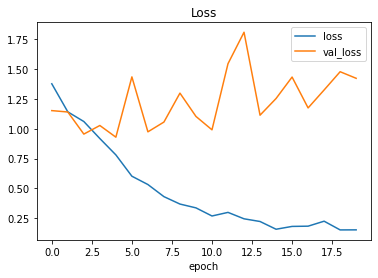

Test accuracy: 0.6315789222717285


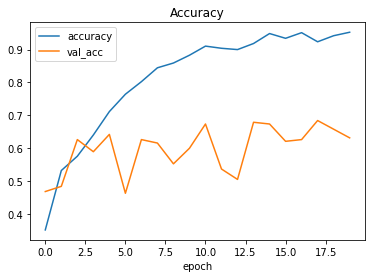

In [ ]:
# TODO: visualize the training history including accuracy curves and loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

#Test set accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

In [ ]:
# TODO: visualize a couple of examples with predicted labels

prediction = ((model.predict(images[:1])))
prediction = prediction[0,:]
print("prediction:", prediction)
prediction1 = ((model.predict(images[:20])))
prediction1 = prediction1[19,:]
print("prediction:", prediction1)



prediction: [1. 0. 0. 0.]
prediction: [1. 0. 0. 0.]


## Task 4: Tune Hyperparameters

In [ ]:
# TODO: write your code here

# Tune network for following hyperparameters

p = {'activation':['relu', 'elu'],
     'learning_rate': [0.0001, 0.001, 0.01],
     'batch_size': [8, 16],
     'epochs':[12,20]}

# Network architecture to tun hyperparameters

def tune_model(X_train, y_train, X_test, y_test, params ):
  inputs = keras.Input(shape=(120, 120 ,3))
  x = layers.Conv2D(64, 3)(inputs) 
  x = keras.activations.relu(x)
  x = Dropout(0.5)(x)
  x = layers.MaxPooling2D((2,2),)(x)
  x = layers.Conv2D(32, 3)(x)
  x = keras.activations.relu(x)
  x = layers.MaxPooling2D((2,2),)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(64, activation=params['activation'], name='first_layer')(x)
  x = Dropout(0.5)(x)
  x = layers.Dense(32, activation=params['activation'], name='second_layer')(x)
  x = Dropout(0.3)(x)
  outputs = layers.Dense(4, activation='softmax')(x)
  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(Adam(learning_rate=params['learning_rate']), 'categorical_crossentropy', metrics=['accuracy'])
  out = model.fit(X_train, y_train, batch_size=params['batch_size'], epochs=params['epochs'], validation_data=(X_test, y_test), shuffle = True)
  print(params['activation'],params['learning_rate'],params['batch_size'],params['epochs'])
  print(model.summary())
  
  return out,model


scan_object = talos.Scan(X_train,
                         y_train,
                         model=tune_model,
                         params=p,
                         experiment_name='first')


  0%|          | 0/24 [00:00<?, ?it/s]

Epoch 1/12
67/67 [==============================] - 2s 23ms/step - loss: 1.4185 - accuracy: 0.2768 - val_loss: 1.3556 - val_accuracy: 0.4474
Epoch 2/12
67/67 [==============================] - 1s 19ms/step - loss: 1.3367 - accuracy: 0.3597 - val_loss: 1.3368 - val_accuracy: 0.3728
Epoch 3/12
67/67 [==============================] - 1s 21ms/step - loss: 1.2442 - accuracy: 0.4218 - val_loss: 1.2645 - val_accuracy: 0.5614
Epoch 4/12
67/67 [==============================] - 1s 21ms/step - loss: 1.1273 - accuracy: 0.5028 - val_loss: 1.1716 - val_accuracy: 0.6053
Epoch 5/12
67/67 [==============================] - 1s 21ms/step - loss: 1.0916 - accuracy: 0.5424 - val_loss: 1.0977 - val_accuracy: 0.5921
Epoch 6/12
67/67 [==============================] - 2s 29ms/step - loss: 1.0711 - accuracy: 0.5556 - val_loss: 1.1056 - val_accuracy: 0.6579
Epoch 7/12
67/67 [==============================] - 1s 22ms/step - loss: 1.0413 - accuracy: 0.5499 - val_loss: 1.0635 - val_accuracy: 0.6140
Epoch 8/12
67


  4%|▍         | 1/24 [00:18<07:16, 18.97s/it]

Epoch 1/12
67/67 [==============================] - 2s 24ms/step - loss: 1.4203 - accuracy: 0.4030 - val_loss: 1.2380 - val_accuracy: 0.4781
Epoch 2/12
67/67 [==============================] - 1s 22ms/step - loss: 1.1833 - accuracy: 0.5273 - val_loss: 1.1598 - val_accuracy: 0.5921
Epoch 3/12
67/67 [==============================] - 1s 22ms/step - loss: 1.0823 - accuracy: 0.5763 - val_loss: 1.1727 - val_accuracy: 0.5307
Epoch 4/12
67/67 [==============================] - 1s 20ms/step - loss: 0.9877 - accuracy: 0.5970 - val_loss: 0.9461 - val_accuracy: 0.6360
Epoch 5/12
67/67 [==============================] - 1s 20ms/step - loss: 0.8679 - accuracy: 0.6497 - val_loss: 0.9355 - val_accuracy: 0.6711
Epoch 6/12
67/67 [==============================] - 1s 22ms/step - loss: 0.8199 - accuracy: 0.6949 - val_loss: 0.9295 - val_accuracy: 0.6842
Epoch 7/12
67/67 [==============================] - 1s 22ms/step - loss: 0.6279 - accuracy: 0.7608 - val_loss: 0.8070 - val_accuracy: 0.7018
Epoch 8/12
67


  8%|▊         | 2/24 [00:40<07:34, 20.64s/it]

Epoch 1/12
67/67 [==============================] - 2s 24ms/step - loss: 2.1542 - accuracy: 0.3145 - val_loss: 1.3198 - val_accuracy: 0.3246
Epoch 2/12
67/67 [==============================] - 1s 20ms/step - loss: 1.3253 - accuracy: 0.3352 - val_loss: 1.3177 - val_accuracy: 0.3509
Epoch 3/12
67/67 [==============================] - 1s 19ms/step - loss: 1.3214 - accuracy: 0.3427 - val_loss: 1.3179 - val_accuracy: 0.3246
Epoch 4/12
67/67 [==============================] - 1s 22ms/step - loss: 1.3178 - accuracy: 0.3597 - val_loss: 1.3203 - val_accuracy: 0.3246
Epoch 5/12
67/67 [==============================] - 1s 22ms/step - loss: 1.3168 - accuracy: 0.3484 - val_loss: 1.3193 - val_accuracy: 0.3246
Epoch 6/12
67/67 [==============================] - 1s 21ms/step - loss: 1.3138 - accuracy: 0.3409 - val_loss: 1.3195 - val_accuracy: 0.3246
Epoch 7/12
67/67 [==============================] - 1s 22ms/step - loss: 1.3183 - accuracy: 0.3446 - val_loss: 1.3192 - val_accuracy: 0.3246
Epoch 8/12
67


 12%|█▎        | 3/24 [00:59<06:50, 19.55s/it]

Epoch 1/20
67/67 [==============================] - 2s 25ms/step - loss: 1.4387 - accuracy: 0.2693 - val_loss: 1.3764 - val_accuracy: 0.3246
Epoch 2/20
67/67 [==============================] - 1s 20ms/step - loss: 1.3849 - accuracy: 0.2712 - val_loss: 1.3821 - val_accuracy: 0.3684
Epoch 3/20
67/67 [==============================] - 1s 22ms/step - loss: 1.3740 - accuracy: 0.2919 - val_loss: 1.3756 - val_accuracy: 0.3246
Epoch 4/20
67/67 [==============================] - 1s 20ms/step - loss: 1.3692 - accuracy: 0.3258 - val_loss: 1.3730 - val_accuracy: 0.3246
Epoch 5/20
67/67 [==============================] - 1s 20ms/step - loss: 1.3368 - accuracy: 0.3427 - val_loss: 1.3311 - val_accuracy: 0.4079
Epoch 6/20
67/67 [==============================] - 1s 22ms/step - loss: 1.3373 - accuracy: 0.3446 - val_loss: 1.3615 - val_accuracy: 0.5307
Epoch 7/20
67/67 [==============================] - 1s 20ms/step - loss: 1.3131 - accuracy: 0.3748 - val_loss: 1.2877 - val_accuracy: 0.5000
Epoch 8/20
67


 17%|█▋        | 4/24 [01:28<07:49, 23.50s/it]

Epoch 1/20
67/67 [==============================] - 2s 25ms/step - loss: 1.4253 - accuracy: 0.3352 - val_loss: 1.3626 - val_accuracy: 0.3246
Epoch 2/20
67/67 [==============================] - 1s 22ms/step - loss: 1.2632 - accuracy: 0.4294 - val_loss: 1.1649 - val_accuracy: 0.5526
Epoch 3/20
67/67 [==============================] - 1s 20ms/step - loss: 1.0898 - accuracy: 0.5556 - val_loss: 1.0410 - val_accuracy: 0.5877
Epoch 4/20
67/67 [==============================] - 1s 22ms/step - loss: 0.9748 - accuracy: 0.6215 - val_loss: 0.9452 - val_accuracy: 0.6667
Epoch 5/20
67/67 [==============================] - 1s 22ms/step - loss: 0.8684 - accuracy: 0.6742 - val_loss: 0.8864 - val_accuracy: 0.7018
Epoch 6/20
67/67 [==============================] - 1s 22ms/step - loss: 0.6654 - accuracy: 0.7476 - val_loss: 0.8606 - val_accuracy: 0.7281
Epoch 7/20
67/67 [==============================] - 1s 20ms/step - loss: 0.5456 - accuracy: 0.8098 - val_loss: 0.8059 - val_accuracy: 0.7500
Epoch 8/20
67


 21%|██        | 5/24 [01:57<08:06, 25.61s/it]

Epoch 1/20
67/67 [==============================] - 2s 25ms/step - loss: 2.5697 - accuracy: 0.3258 - val_loss: 1.3228 - val_accuracy: 0.3246
Epoch 2/20
67/67 [==============================] - 1s 19ms/step - loss: 1.3228 - accuracy: 0.3145 - val_loss: 1.3201 - val_accuracy: 0.3246
Epoch 3/20
67/67 [==============================] - 1s 21ms/step - loss: 1.3175 - accuracy: 0.3315 - val_loss: 1.3195 - val_accuracy: 0.3246
Epoch 4/20
67/67 [==============================] - 1s 19ms/step - loss: 1.3153 - accuracy: 0.3559 - val_loss: 1.3175 - val_accuracy: 0.3509
Epoch 5/20
67/67 [==============================] - 1s 19ms/step - loss: 1.3122 - accuracy: 0.3729 - val_loss: 1.3220 - val_accuracy: 0.3246
Epoch 6/20
67/67 [==============================] - 1s 19ms/step - loss: 1.3193 - accuracy: 0.3559 - val_loss: 1.3235 - val_accuracy: 0.3246
Epoch 7/20
67/67 [==============================] - 1s 18ms/step - loss: 1.3169 - accuracy: 0.3333 - val_loss: 1.3198 - val_accuracy: 0.3246
Epoch 8/20
67


 25%|██▌       | 6/24 [02:26<07:57, 26.52s/it]

Epoch 1/12
34/34 [==============================] - 2s 38ms/step - loss: 1.3788 - accuracy: 0.2957 - val_loss: 1.3599 - val_accuracy: 0.3246
Epoch 2/12
34/34 [==============================] - 1s 32ms/step - loss: 1.3688 - accuracy: 0.3051 - val_loss: 1.3683 - val_accuracy: 0.5439
Epoch 3/12
34/34 [==============================] - 1s 31ms/step - loss: 1.3306 - accuracy: 0.3333 - val_loss: 1.3449 - val_accuracy: 0.4298
Epoch 4/12
34/34 [==============================] - 1s 31ms/step - loss: 1.3322 - accuracy: 0.3597 - val_loss: 1.3348 - val_accuracy: 0.5307
Epoch 5/12
34/34 [==============================] - 1s 31ms/step - loss: 1.2664 - accuracy: 0.4162 - val_loss: 1.2804 - val_accuracy: 0.5263
Epoch 6/12
34/34 [==============================] - 1s 32ms/step - loss: 1.2214 - accuracy: 0.4407 - val_loss: 1.2279 - val_accuracy: 0.4868
Epoch 7/12
34/34 [==============================] - 1s 31ms/step - loss: 1.1663 - accuracy: 0.4972 - val_loss: 1.1688 - val_accuracy: 0.6053
Epoch 8/12
34


 29%|██▉       | 7/24 [02:48<07:04, 24.97s/it]

Epoch 1/12
34/34 [==============================] - 2s 40ms/step - loss: 1.5922 - accuracy: 0.3352 - val_loss: 1.3272 - val_accuracy: 0.4561
Epoch 2/12
34/34 [==============================] - 1s 30ms/step - loss: 1.2272 - accuracy: 0.4463 - val_loss: 1.1509 - val_accuracy: 0.5219
Epoch 3/12
34/34 [==============================] - 1s 31ms/step - loss: 1.1324 - accuracy: 0.4859 - val_loss: 1.1393 - val_accuracy: 0.5658
Epoch 4/12
34/34 [==============================] - 1s 31ms/step - loss: 1.0387 - accuracy: 0.5857 - val_loss: 1.0218 - val_accuracy: 0.5614
Epoch 5/12
34/34 [==============================] - 1s 30ms/step - loss: 0.9696 - accuracy: 0.6290 - val_loss: 0.9824 - val_accuracy: 0.6360
Epoch 6/12
34/34 [==============================] - 1s 31ms/step - loss: 0.8161 - accuracy: 0.6742 - val_loss: 0.8964 - val_accuracy: 0.6930
Epoch 7/12
34/34 [==============================] - 1s 30ms/step - loss: 0.6777 - accuracy: 0.7420 - val_loss: 0.8207 - val_accuracy: 0.7193
Epoch 8/12
34


 33%|███▎      | 8/24 [03:09<06:23, 23.94s/it]

Epoch 1/12
34/34 [==============================] - 2s 35ms/step - loss: 2.8445 - accuracy: 0.3352 - val_loss: 1.3227 - val_accuracy: 0.3246
Epoch 2/12
34/34 [==============================] - 1s 29ms/step - loss: 1.3194 - accuracy: 0.3315 - val_loss: 1.3192 - val_accuracy: 0.3246
Epoch 3/12
34/34 [==============================] - 1s 29ms/step - loss: 1.3219 - accuracy: 0.3597 - val_loss: 1.3199 - val_accuracy: 0.3246
Epoch 4/12
34/34 [==============================] - 1s 30ms/step - loss: 1.3192 - accuracy: 0.3333 - val_loss: 1.3196 - val_accuracy: 0.3246
Epoch 5/12
34/34 [==============================] - 1s 29ms/step - loss: 1.3153 - accuracy: 0.3540 - val_loss: 1.3216 - val_accuracy: 0.3246
Epoch 6/12
34/34 [==============================] - 1s 29ms/step - loss: 1.3148 - accuracy: 0.3258 - val_loss: 1.3190 - val_accuracy: 0.3246
Epoch 7/12
34/34 [==============================] - 1s 29ms/step - loss: 1.3143 - accuracy: 0.3371 - val_loss: 1.3190 - val_accuracy: 0.3246
Epoch 8/12
34


 38%|███▊      | 9/24 [03:23<05:10, 20.69s/it]

Epoch 1/20
34/34 [==============================] - 2s 38ms/step - loss: 1.4050 - accuracy: 0.2825 - val_loss: 1.3418 - val_accuracy: 0.4518
Epoch 2/20
34/34 [==============================] - 1s 30ms/step - loss: 1.3451 - accuracy: 0.3239 - val_loss: 1.3461 - val_accuracy: 0.5000
Epoch 3/20
34/34 [==============================] - 1s 30ms/step - loss: 1.3169 - accuracy: 0.3766 - val_loss: 1.3332 - val_accuracy: 0.4737
Epoch 4/20
34/34 [==============================] - 1s 30ms/step - loss: 1.2890 - accuracy: 0.4200 - val_loss: 1.3048 - val_accuracy: 0.4561
Epoch 5/20
34/34 [==============================] - 1s 30ms/step - loss: 1.2650 - accuracy: 0.4426 - val_loss: 1.2618 - val_accuracy: 0.5526
Epoch 6/20
34/34 [==============================] - 1s 31ms/step - loss: 1.1729 - accuracy: 0.4878 - val_loss: 1.1954 - val_accuracy: 0.5833
Epoch 7/20
34/34 [==============================] - 1s 30ms/step - loss: 1.1474 - accuracy: 0.5292 - val_loss: 1.1524 - val_accuracy: 0.5570
Epoch 8/20
34


 42%|████▏     | 10/24 [04:05<06:22, 27.35s/it]

Epoch 1/20
34/34 [==============================] - 2s 40ms/step - loss: 1.4157 - accuracy: 0.3390 - val_loss: 1.3099 - val_accuracy: 0.5000
Epoch 2/20
34/34 [==============================] - 1s 30ms/step - loss: 1.2493 - accuracy: 0.4482 - val_loss: 1.1808 - val_accuracy: 0.5482
Epoch 3/20
34/34 [==============================] - 1s 30ms/step - loss: 1.1291 - accuracy: 0.4934 - val_loss: 1.0637 - val_accuracy: 0.5351
Epoch 4/20
34/34 [==============================] - 1s 30ms/step - loss: 0.9894 - accuracy: 0.5819 - val_loss: 1.0898 - val_accuracy: 0.5307
Epoch 5/20
34/34 [==============================] - 1s 29ms/step - loss: 0.9262 - accuracy: 0.6328 - val_loss: 0.9893 - val_accuracy: 0.6360
Epoch 6/20
34/34 [==============================] - 1s 30ms/step - loss: 0.7305 - accuracy: 0.6836 - val_loss: 0.8761 - val_accuracy: 0.6974
Epoch 7/20
34/34 [==============================] - 1s 30ms/step - loss: 0.6776 - accuracy: 0.7307 - val_loss: 0.8659 - val_accuracy: 0.6930
Epoch 8/20
34


 46%|████▌     | 11/24 [04:27<05:35, 25.80s/it]

Epoch 1/20
34/34 [==============================] - 2s 37ms/step - loss: 2.6090 - accuracy: 0.3559 - val_loss: 1.3267 - val_accuracy: 0.3246
Epoch 2/20
34/34 [==============================] - 1s 29ms/step - loss: 1.3163 - accuracy: 0.3427 - val_loss: 1.3208 - val_accuracy: 0.3246
Epoch 3/20
34/34 [==============================] - 1s 30ms/step - loss: 1.3157 - accuracy: 0.3540 - val_loss: 1.3190 - val_accuracy: 0.3246
Epoch 4/20
34/34 [==============================] - 1s 30ms/step - loss: 1.3177 - accuracy: 0.3277 - val_loss: 1.3194 - val_accuracy: 0.3246
Epoch 5/20
34/34 [==============================] - 1s 30ms/step - loss: 1.3126 - accuracy: 0.3446 - val_loss: 1.3191 - val_accuracy: 0.3246
Epoch 6/20
34/34 [==============================] - 1s 29ms/step - loss: 1.3162 - accuracy: 0.3672 - val_loss: 1.3193 - val_accuracy: 0.3246
Epoch 7/20
34/34 [==============================] - 1s 30ms/step - loss: 1.3176 - accuracy: 0.3409 - val_loss: 1.3196 - val_accuracy: 0.3246
Epoch 8/20
34


 50%|█████     | 12/24 [04:49<04:55, 24.60s/it]

Epoch 1/12
67/67 [==============================] - 2s 22ms/step - loss: 1.4334 - accuracy: 0.3710 - val_loss: 1.2509 - val_accuracy: 0.5658
Epoch 2/12
67/67 [==============================] - 1s 21ms/step - loss: 1.1139 - accuracy: 0.5141 - val_loss: 1.0930 - val_accuracy: 0.6009
Epoch 3/12
67/67 [==============================] - 1s 18ms/step - loss: 0.9545 - accuracy: 0.6309 - val_loss: 1.0467 - val_accuracy: 0.6579
Epoch 4/12
67/67 [==============================] - 1s 18ms/step - loss: 0.8215 - accuracy: 0.6930 - val_loss: 0.9316 - val_accuracy: 0.6579
Epoch 5/12
67/67 [==============================] - 1s 20ms/step - loss: 0.7235 - accuracy: 0.7345 - val_loss: 0.9041 - val_accuracy: 0.6667
Epoch 6/12
67/67 [==============================] - 1s 19ms/step - loss: 0.6381 - accuracy: 0.7721 - val_loss: 0.8401 - val_accuracy: 0.7105
Epoch 7/12
67/67 [==============================] - 1s 18ms/step - loss: 0.5204 - accuracy: 0.8305 - val_loss: 0.8444 - val_accuracy: 0.7105
Epoch 8/12
67


 54%|█████▍    | 13/24 [05:06<04:05, 22.33s/it]

Epoch 1/12
67/67 [==============================] - 2s 22ms/step - loss: 1.4735 - accuracy: 0.4350 - val_loss: 1.0791 - val_accuracy: 0.5439
Epoch 2/12
67/67 [==============================] - 1s 21ms/step - loss: 1.0126 - accuracy: 0.6008 - val_loss: 0.9688 - val_accuracy: 0.6009
Epoch 3/12
67/67 [==============================] - 1s 19ms/step - loss: 0.7485 - accuracy: 0.7175 - val_loss: 0.9527 - val_accuracy: 0.6404
Epoch 4/12
67/67 [==============================] - 1s 18ms/step - loss: 0.5593 - accuracy: 0.7928 - val_loss: 0.9269 - val_accuracy: 0.6842
Epoch 5/12
67/67 [==============================] - 1s 19ms/step - loss: 0.4432 - accuracy: 0.8418 - val_loss: 0.9441 - val_accuracy: 0.6404
Epoch 6/12
67/67 [==============================] - 1s 18ms/step - loss: 0.2910 - accuracy: 0.9021 - val_loss: 0.9620 - val_accuracy: 0.6491
Epoch 7/12
67/67 [==============================] - 1s 18ms/step - loss: 0.2131 - accuracy: 0.9435 - val_loss: 1.0861 - val_accuracy: 0.6360
Epoch 8/12
67


 58%|█████▊    | 14/24 [05:23<03:26, 20.68s/it]

Epoch 1/12
67/67 [==============================] - 2s 22ms/step - loss: 2.2763 - accuracy: 0.3258 - val_loss: 1.3256 - val_accuracy: 0.3509
Epoch 2/12
67/67 [==============================] - 1s 19ms/step - loss: 1.3286 - accuracy: 0.3465 - val_loss: 1.3175 - val_accuracy: 0.3509
Epoch 3/12
67/67 [==============================] - 1s 21ms/step - loss: 1.3406 - accuracy: 0.3427 - val_loss: 1.3206 - val_accuracy: 0.3246
Epoch 4/12
67/67 [==============================] - 1s 21ms/step - loss: 1.3394 - accuracy: 0.3465 - val_loss: 1.3178 - val_accuracy: 0.3509
Epoch 5/12
67/67 [==============================] - 1s 18ms/step - loss: 1.3382 - accuracy: 0.3352 - val_loss: 1.3242 - val_accuracy: 0.3509
Epoch 6/12
67/67 [==============================] - 1s 20ms/step - loss: 1.3300 - accuracy: 0.3315 - val_loss: 1.3325 - val_accuracy: 0.3246
Epoch 7/12
67/67 [==============================] - 1s 19ms/step - loss: 1.3405 - accuracy: 0.3258 - val_loss: 1.3264 - val_accuracy: 0.3246
Epoch 8/12
67


 62%|██████▎   | 15/24 [05:45<03:09, 21.01s/it]

Epoch 1/20
67/67 [==============================] - 2s 23ms/step - loss: 1.5563 - accuracy: 0.3315 - val_loss: 1.2921 - val_accuracy: 0.5219
Epoch 2/20
67/67 [==============================] - 1s 21ms/step - loss: 1.0774 - accuracy: 0.5650 - val_loss: 1.0933 - val_accuracy: 0.5789
Epoch 3/20
67/67 [==============================] - 1s 18ms/step - loss: 1.0063 - accuracy: 0.5857 - val_loss: 1.0586 - val_accuracy: 0.6579
Epoch 4/20
67/67 [==============================] - 1s 19ms/step - loss: 0.8391 - accuracy: 0.7006 - val_loss: 0.9821 - val_accuracy: 0.7018
Epoch 5/20
67/67 [==============================] - 1s 21ms/step - loss: 0.7242 - accuracy: 0.7194 - val_loss: 0.9242 - val_accuracy: 0.6272
Epoch 6/20
67/67 [==============================] - 1s 21ms/step - loss: 0.6631 - accuracy: 0.7401 - val_loss: 0.8857 - val_accuracy: 0.6886
Epoch 7/20
67/67 [==============================] - 1s 21ms/step - loss: 0.6085 - accuracy: 0.7721 - val_loss: 0.9042 - val_accuracy: 0.6228
Epoch 8/20
67


 67%|██████▋   | 16/24 [06:27<03:39, 27.40s/it]

Epoch 1/20
67/67 [==============================] - 2s 23ms/step - loss: 1.3589 - accuracy: 0.4256 - val_loss: 1.1626 - val_accuracy: 0.5702
Epoch 2/20
67/67 [==============================] - 1s 19ms/step - loss: 0.9258 - accuracy: 0.6309 - val_loss: 1.0263 - val_accuracy: 0.6447
Epoch 3/20
67/67 [==============================] - 1s 21ms/step - loss: 0.6783 - accuracy: 0.7288 - val_loss: 0.8125 - val_accuracy: 0.7368
Epoch 4/20
67/67 [==============================] - 1s 21ms/step - loss: 0.4107 - accuracy: 0.8606 - val_loss: 0.7399 - val_accuracy: 0.7456
Epoch 5/20
67/67 [==============================] - 1s 19ms/step - loss: 0.3462 - accuracy: 0.8644 - val_loss: 0.7984 - val_accuracy: 0.7281
Epoch 6/20
67/67 [==============================] - 1s 21ms/step - loss: 0.2010 - accuracy: 0.9397 - val_loss: 0.8219 - val_accuracy: 0.7412
Epoch 7/20
67/67 [==============================] - 1s 19ms/step - loss: 0.1872 - accuracy: 0.9379 - val_loss: 0.7962 - val_accuracy: 0.7368
Epoch 8/20
67


 71%|███████   | 17/24 [06:55<03:13, 27.58s/it]

Epoch 1/20
67/67 [==============================] - 2s 24ms/step - loss: 2.5372 - accuracy: 0.3390 - val_loss: 1.3197 - val_accuracy: 0.3509
Epoch 2/20
67/67 [==============================] - 1s 20ms/step - loss: 1.3380 - accuracy: 0.3390 - val_loss: 1.3374 - val_accuracy: 0.3246
Epoch 3/20
67/67 [==============================] - 1s 21ms/step - loss: 1.3437 - accuracy: 0.3352 - val_loss: 1.3386 - val_accuracy: 0.3246
Epoch 4/20
67/67 [==============================] - 1s 21ms/step - loss: 1.3330 - accuracy: 0.3597 - val_loss: 1.3398 - val_accuracy: 0.3246
Epoch 5/20
67/67 [==============================] - 1s 21ms/step - loss: 1.3323 - accuracy: 0.3427 - val_loss: 1.3197 - val_accuracy: 0.3509
Epoch 6/20
67/67 [==============================] - 1s 19ms/step - loss: 1.3331 - accuracy: 0.3296 - val_loss: 1.3366 - val_accuracy: 0.3246
Epoch 7/20
67/67 [==============================] - 1s 19ms/step - loss: 1.3285 - accuracy: 0.3503 - val_loss: 1.3321 - val_accuracy: 0.3246
Epoch 8/20
67


 75%|███████▌  | 18/24 [07:23<02:46, 27.75s/it]

Epoch 1/12
34/34 [==============================] - 2s 37ms/step - loss: 1.3961 - accuracy: 0.3748 - val_loss: 1.2285 - val_accuracy: 0.6096
Epoch 2/12
34/34 [==============================] - 1s 31ms/step - loss: 1.1748 - accuracy: 0.5217 - val_loss: 1.1247 - val_accuracy: 0.6228
Epoch 3/12
34/34 [==============================] - 1s 31ms/step - loss: 0.9762 - accuracy: 0.5913 - val_loss: 1.0149 - val_accuracy: 0.6228
Epoch 4/12
34/34 [==============================] - 1s 31ms/step - loss: 0.8638 - accuracy: 0.6516 - val_loss: 0.9738 - val_accuracy: 0.6096
Epoch 5/12
34/34 [==============================] - 1s 31ms/step - loss: 0.8164 - accuracy: 0.6761 - val_loss: 0.9225 - val_accuracy: 0.6535
Epoch 6/12
34/34 [==============================] - 1s 30ms/step - loss: 0.7232 - accuracy: 0.7420 - val_loss: 0.8547 - val_accuracy: 0.6711
Epoch 7/12
34/34 [==============================] - 1s 30ms/step - loss: 0.6541 - accuracy: 0.7646 - val_loss: 0.8201 - val_accuracy: 0.7193
Epoch 8/12
34


 79%|███████▉  | 19/24 [07:37<01:58, 23.66s/it]

Epoch 1/12
34/34 [==============================] - 2s 38ms/step - loss: 1.4705 - accuracy: 0.3748 - val_loss: 1.2059 - val_accuracy: 0.5219
Epoch 2/12
34/34 [==============================] - 1s 30ms/step - loss: 1.0222 - accuracy: 0.5725 - val_loss: 0.9559 - val_accuracy: 0.6974
Epoch 3/12
34/34 [==============================] - 1s 30ms/step - loss: 0.7549 - accuracy: 0.7250 - val_loss: 0.8116 - val_accuracy: 0.7193
Epoch 4/12
34/34 [==============================] - 1s 30ms/step - loss: 0.6077 - accuracy: 0.8004 - val_loss: 0.7995 - val_accuracy: 0.7456
Epoch 5/12
34/34 [==============================] - 1s 30ms/step - loss: 0.4405 - accuracy: 0.8493 - val_loss: 0.7503 - val_accuracy: 0.7544
Epoch 6/12
34/34 [==============================] - 1s 30ms/step - loss: 0.3492 - accuracy: 0.8983 - val_loss: 0.7592 - val_accuracy: 0.7719
Epoch 7/12
34/34 [==============================] - 1s 31ms/step - loss: 0.2419 - accuracy: 0.9134 - val_loss: 0.8319 - val_accuracy: 0.7368
Epoch 8/12
34


 83%|████████▎ | 20/24 [07:59<01:32, 23.10s/it]

Epoch 1/12
34/34 [==============================] - 2s 39ms/step - loss: 2.9867 - accuracy: 0.3296 - val_loss: 1.3201 - val_accuracy: 0.3509
Epoch 2/12
34/34 [==============================] - 1s 30ms/step - loss: 1.3251 - accuracy: 0.3409 - val_loss: 1.3218 - val_accuracy: 0.3246
Epoch 3/12
34/34 [==============================] - 1s 29ms/step - loss: 1.3329 - accuracy: 0.3390 - val_loss: 1.3398 - val_accuracy: 0.3246
Epoch 4/12
34/34 [==============================] - 1s 29ms/step - loss: 1.3305 - accuracy: 0.3352 - val_loss: 1.3263 - val_accuracy: 0.3246
Epoch 5/12
34/34 [==============================] - 1s 29ms/step - loss: 1.3354 - accuracy: 0.3427 - val_loss: 1.3300 - val_accuracy: 0.3246
Epoch 6/12
34/34 [==============================] - 1s 30ms/step - loss: 1.3201 - accuracy: 0.3446 - val_loss: 1.3223 - val_accuracy: 0.3509
Epoch 7/12
34/34 [==============================] - 1s 32ms/step - loss: 1.3315 - accuracy: 0.3070 - val_loss: 1.3182 - val_accuracy: 0.3509
Epoch 8/12
34


 88%|████████▊ | 21/24 [08:21<01:08, 22.70s/it]

Epoch 1/20
34/34 [==============================] - 2s 37ms/step - loss: 1.4609 - accuracy: 0.3390 - val_loss: 1.2357 - val_accuracy: 0.5439
Epoch 2/20
34/34 [==============================] - 1s 30ms/step - loss: 1.1955 - accuracy: 0.4802 - val_loss: 1.1544 - val_accuracy: 0.5526
Epoch 3/20
34/34 [==============================] - 1s 31ms/step - loss: 0.9845 - accuracy: 0.6008 - val_loss: 1.0299 - val_accuracy: 0.6491
Epoch 4/20
34/34 [==============================] - 1s 31ms/step - loss: 0.8797 - accuracy: 0.6497 - val_loss: 0.9806 - val_accuracy: 0.6272
Epoch 5/20
34/34 [==============================] - 1s 31ms/step - loss: 0.7930 - accuracy: 0.7081 - val_loss: 0.9224 - val_accuracy: 0.6579
Epoch 6/20
34/34 [==============================] - 1s 31ms/step - loss: 0.7189 - accuracy: 0.7420 - val_loss: 0.8841 - val_accuracy: 0.6842
Epoch 7/20
34/34 [==============================] - 1s 30ms/step - loss: 0.6093 - accuracy: 0.7947 - val_loss: 0.8485 - val_accuracy: 0.6798
Epoch 8/20
34


 92%|█████████▏| 22/24 [08:44<00:45, 22.65s/it]

Epoch 1/20
34/34 [==============================] - 2s 37ms/step - loss: 1.4668 - accuracy: 0.4143 - val_loss: 1.2757 - val_accuracy: 0.5482
Epoch 2/20
34/34 [==============================] - 1s 31ms/step - loss: 1.0691 - accuracy: 0.5612 - val_loss: 0.9629 - val_accuracy: 0.5789
Epoch 3/20
34/34 [==============================] - 1s 31ms/step - loss: 0.7594 - accuracy: 0.7175 - val_loss: 0.9582 - val_accuracy: 0.7018
Epoch 4/20
34/34 [==============================] - 1s 31ms/step - loss: 0.5455 - accuracy: 0.8136 - val_loss: 0.7564 - val_accuracy: 0.7193
Epoch 5/20
34/34 [==============================] - 1s 31ms/step - loss: 0.3782 - accuracy: 0.8776 - val_loss: 0.8021 - val_accuracy: 0.6886
Epoch 6/20
34/34 [==============================] - 1s 31ms/step - loss: 0.2814 - accuracy: 0.8945 - val_loss: 0.7772 - val_accuracy: 0.7018
Epoch 7/20
34/34 [==============================] - 1s 31ms/step - loss: 0.1847 - accuracy: 0.9416 - val_loss: 0.9160 - val_accuracy: 0.6798
Epoch 8/20
34


 96%|█████████▌| 23/24 [09:26<00:28, 28.53s/it]

Epoch 1/20
34/34 [==============================] - 2s 40ms/step - loss: 2.8773 - accuracy: 0.3202 - val_loss: 1.3273 - val_accuracy: 0.3246
Epoch 2/20
34/34 [==============================] - 1s 30ms/step - loss: 1.3202 - accuracy: 0.3202 - val_loss: 1.3294 - val_accuracy: 0.3509
Epoch 3/20
34/34 [==============================] - 1s 30ms/step - loss: 1.3317 - accuracy: 0.3371 - val_loss: 1.3233 - val_accuracy: 0.3246
Epoch 4/20
34/34 [==============================] - 1s 29ms/step - loss: 1.3377 - accuracy: 0.3371 - val_loss: 1.3189 - val_accuracy: 0.3246
Epoch 5/20
34/34 [==============================] - 1s 29ms/step - loss: 1.3351 - accuracy: 0.3503 - val_loss: 1.3212 - val_accuracy: 0.3509
Epoch 6/20
34/34 [==============================] - 1s 30ms/step - loss: 1.3311 - accuracy: 0.3183 - val_loss: 1.3200 - val_accuracy: 0.3509
Epoch 7/20
34/34 [==============================] - 1s 30ms/step - loss: 1.3299 - accuracy: 0.3390 - val_loss: 1.3190 - val_accuracy: 0.3246
Epoch 8/20
34


100%|██████████| 24/24 [10:08<00:00, 25.35s/it]


**Write your analysis here in a beautiful format.**


In many cases train accuracy and test accuracy above 90% and 70%. But those were overfitting. As test accuracy fluctuating too much this was clear sign of overfitting. The optimize model I choose is with activation function 'elu', learning rate = 0.0001, batch size=16 and epochs =20. This model generalize well with test dataset. The validation accuracy does not fluctuate too much. In this data set test and train dataset is small. The only way we can tackle overfittng is by image augmentation we can increase tarin and test datasize.

## Task 5: Conclusion

In [ ]:
# TODO: visualize the optimal model

# Visualize the model based on above iterations

def optimized_model(params):

  inputs = keras.Input(shape=(120, 120 ,3))                               # Input data shape                                  
  x = layers.Conv2D(64, 3)(inputs)                                        # Convolution by 64 filters with size (3,3)
  x = keras.activations.relu(x)                                           # Relu activation function
  x = Dropout(0.5)(x)                                                     # Dropout for overfitting
  x = layers.MaxPooling2D((2,2),)(x)                                      # Max pooling 
  x = layers.Conv2D(32, 3)(x)                                             
  x = keras.activations.relu(x)
  x = layers.MaxPooling2D((2,2),)(x)
  x = layers.Flatten()(x)                                                 # Flatten dataset for input to Fully connected layer
  x = layers.Dense(64, activation='elu', name='first_layer')(x)          # First layer of fully connecte dlayer with 64 neuron and relu activation
  x = Dropout(0.5)(x)
  x = layers.Dense(32, activation='elu', name='second_layer')(x)         # Second layer of fully connecte dlayer with 64 neuron and relu activation
  x = Dropout(0.3)(x)
  outputs = layers.Dense(4, activation='softmax')(x)                      # Output layer with 4 node with softmax activation function
  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(Adam(learning_rate=0.0001), 'categorical_crossentropy', metrics=['accuracy'])  # Learning rate with Adam optimizer
  return model

# Parameters for first network

params = {'activation':'elu',
          'learning_rate': 0.0001,
          'batch_size': 16}

model = optimized_model(params)
print(model.summary())

history = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_test, y_test), shuffle = True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 118, 118, 64)      1792      
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 118, 118, 64)      0         
                                                                 
 dropout (Dropout)           (None, 118, 118, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 32)        18464     
                                                             

**List hyperparameters and their values of your optimal model**

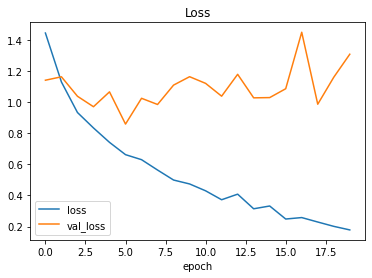

Test accuracy: 0.5421052575111389


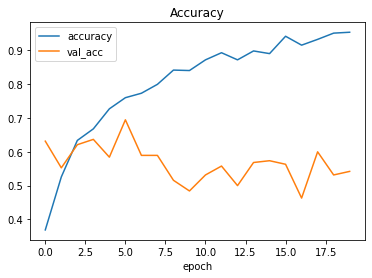

In [ ]:
# TODO: visualize the training history including accuracy curves and loss curves of your optimal model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

#Test set accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

In [ ]:
# TODO: visualize some examples with predicted labels


prediction = ((model.predict(images[:1])))
prediction = prediction[0,:]
print("prediction:", prediction)
prediction1 = ((model.predict(images[:20])))
prediction1 = prediction1[19,:]
print("prediction:", prediction1)

prediction: [1. 0. 0. 0.]
prediction: [1.0000000e+00 2.7676652e-25 0.0000000e+00 0.0000000e+00]
